In [20]:
!pip install seaborn matplotlib pandas plotly --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные из parquet
df = pd.read_parquet("c:/Users/malin/my_project/my_project.parquet")

print(df.columns)  # <-- смотрим все столбцы


Index(['id', 'birthday', 'Dem_St_Age', 'Dem_St_Sex', 'Dem_St_SityStatus',
       'Family_amount', 'Dem_St_EducationProfile', 'Dem_St_EducationDirect',
       'nationality', 'bilingualism', 'bilingualism_level', 'income_level',
       'Fin_level', 'a_full_fledged_family', 'breastfeeding',
       'childhood_abuse', 'chronic_disease', 'smoking', 'smoking_level',
       'sports_frequency', 'sports_name', 'antibiotic', 'hormonal_therapy',
       'family_psychiatric_disease', 'covid19', 'covid19_how_many_times',
       'covid19_symptoms', 'covid19_symptoms_other', 'covid19_degree',
       'changes_in_precognitive_disorders', 'covid19_other_problems_other',
       'GWAS', 'Genotek', 'SAS-SV', 'V2', 'SNP1_174868700', 'SNP2_78171124',
       'SNP3_78172260', 'SNP4_18047255', 'SNP5_18047816', 'SNP6_113346955',
       'SNP7_113803028', 'SNP8_72331923', 'SNP9_72372862', 'SNP10_47409034',
       'SNP11_28551665', 'SNP12_19951271', 'SNP13_27677041', 'SNP14_27679916',
       'SNP15_63261329', 'SNP16_

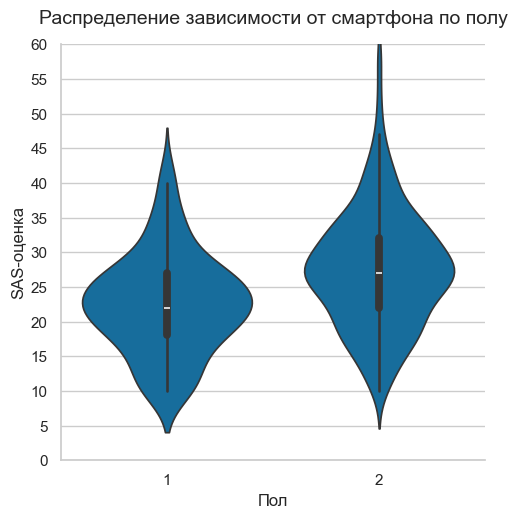

In [29]:
import seaborn as sns

# Настраиваем стиль и палитру заранее
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")  # научная палитра, оптимальна для дальтоников

g = sns.catplot(
    data=df,
    x="Dem_St_Sex",
    y="SAS-SV",
    kind="violin",
).set(ylim=(0, 60))

# Шаг значений и подписи
for ax in g.axes.flat:
    ax.set_yticks(range(0, 61, 5))
    ax.set_xlabel("Пол", fontsize=12)
    ax.set_ylabel("SAS-оценка", fontsize=12)
    ax.set_title("Распределение зависимости от смартфона по полу", fontsize=14, pad=15)

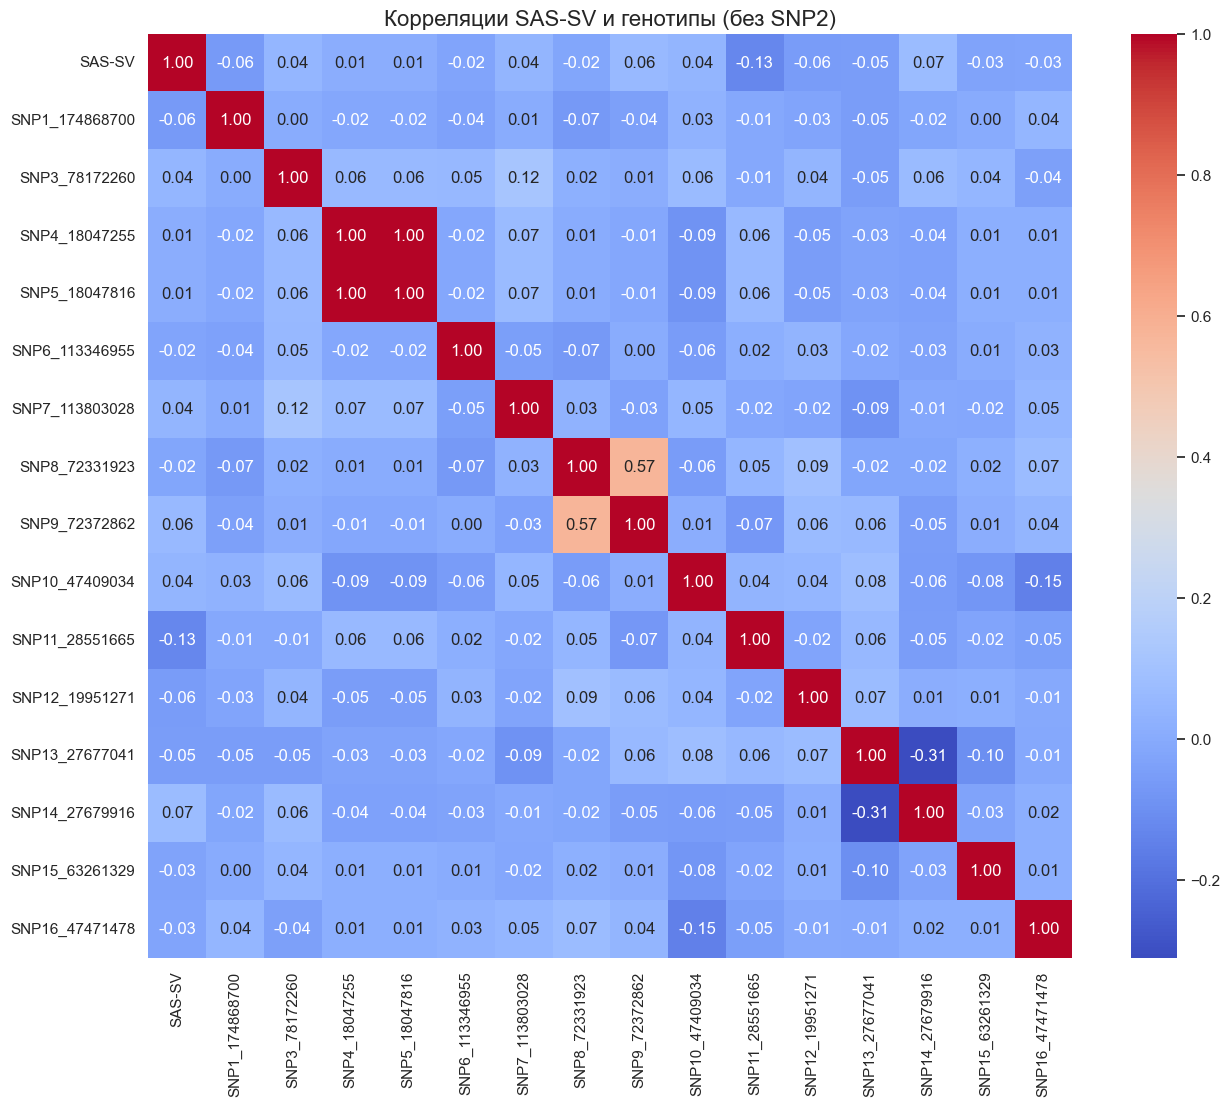

In [38]:
# Берём все SNP-столбцы, кроме SNP2 (без значений)
snp_cols = [col for col in df.columns if col.startswith("SNP") and not col.startswith("SNP2")]

# Выбираем числовые колонки для корреляции
num_cols = ['SAS-SV'] + snp_cols

# Строим корреляционную матрицу
corr = df[num_cols].corr()

# Настраиваем фигуру для читабельности
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляции SAS-SV и генотипы (без SNP2)", fontsize=16)
plt.show()


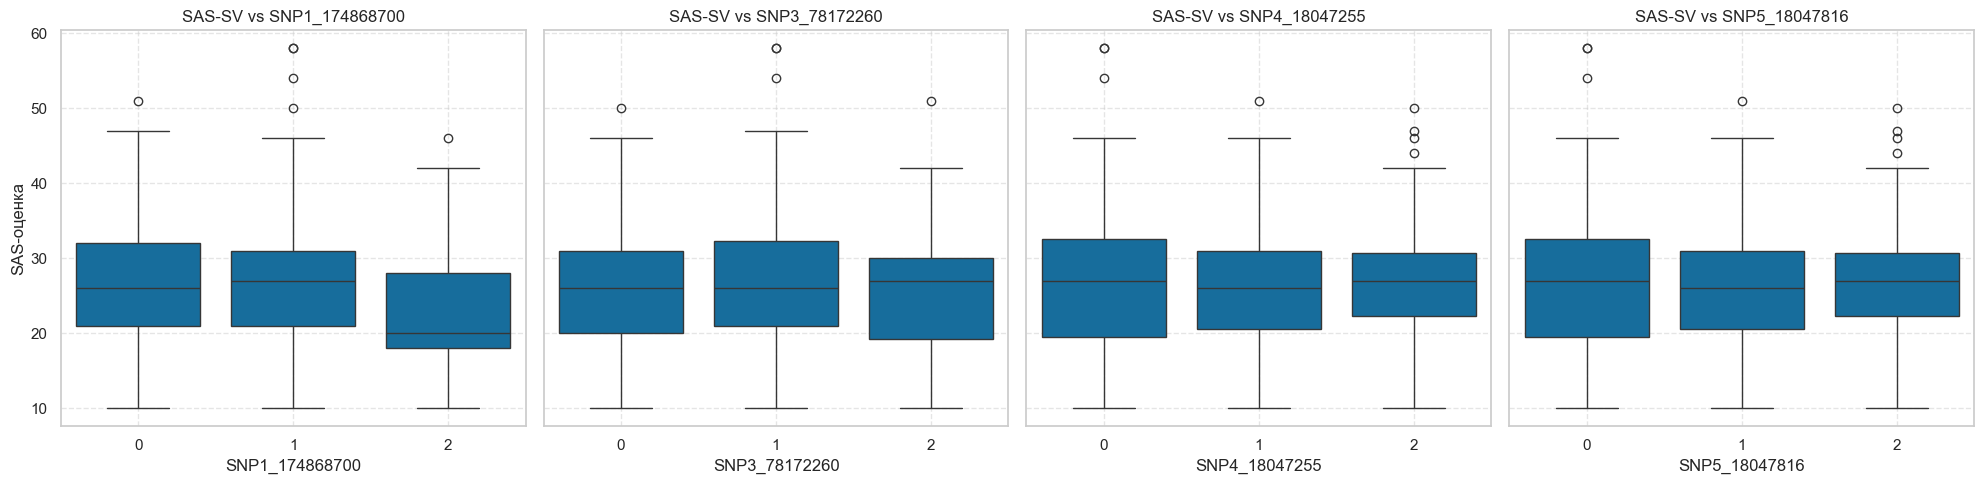

In [ ]:
# Настраиваем стиль и палитру
sns.set_theme(style="whitegrid", palette="colorblind")

# Список SNP для визуализации (убрал SNP2, как ты хотел)
snps = ['SNP1_174868700', 'SNP3_78172260', 'SNP4_18047255', 'SNP5_18047816'']

# Создаем сетку графиков
fig, axes = plt.subplots(1, len(snps), figsize=(5*len(snps), 5), sharey=True)

for ax, snp in zip(axes, snps):
    sns.boxplot(data=df, x=snp, y='SAS-SV', ax=ax)
    ax.set_xlabel(snp)
    ax.set_ylabel('SAS-оценка')
    ax.set_title(f'SAS-SV vs {snp}')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()